In [159]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import numpy as np
import plotly.express as px
import seaborn as sns
import os
from datetime import datetime
from importlib import reload
import functions
reload(functions)

<module 'functions' from '/home/elmunoz42/aimlbootcamp/aimlbootcamp/universal-analytics-data/functions.py'>

In [160]:
# Cosolidate the Data into a pages CSV file with all quarters.
try:
    df = functions.build_ua_pages_dataframe('cransten/WP/Pages/', 'pages')
    # print(df.head())
    print(df.dtypes)
except ValueError as e:
    print(f"Error: {str(e)}")

Processing file: data/cransten/WP/Pages/Analytics All Web Site Data Pages 20171001-20171231.csv
Successfully processed Analytics All Web Site Data Pages 20171001-20171231.csv
Processing file: data/cransten/WP/Pages/Analytics All Web Site Data Pages 20180401-20180630.csv
Successfully processed Analytics All Web Site Data Pages 20180401-20180630.csv
Processing file: data/cransten/WP/Pages/Analytics All Web Site Data Pages 20180701-20180930.csv
Successfully processed Analytics All Web Site Data Pages 20180701-20180930.csv
Processing file: data/cransten/WP/Pages/Analytics All Web Site Data Pages 20180101-20180331.csv
Successfully processed Analytics All Web Site Data Pages 20180101-20180331.csv
Columns in the combined DataFrame:
['Page', 'Pageviews', 'Unique Pageviews', 'Avg. Time on Page', 'Entrances', 'Bounce Rate', '% Exit', 'Page Value', 'Year', 'Quarter']
Saved consolidated data to output/cransten/WP/Pages/consolidated-pages.csv
Page                  object
Pageviews             objec

In [161]:
# Read the CSV file
df_pages = pd.read_csv('output/cransten/WP/Pages/consolidated-pages.csv')
# Display the DataFrame
print(df.head())

                            Page Pageviews  Unique Pageviews  \
0                              /     3,053            1184.0   
1                          /cart       865             140.0   
2  /collections/service-packages       617             213.0   
3          /pages/cransten-solar       584             139.0   
4                /pages/features       565             175.0   

  Avg. Time on Page  Entrances  Bounce Rate  % Exit Page Value  Year Quarter  
0          00:02:42     1058.0       0.4717  24.47%      $0.00  2017      Q4  
1          00:01:21       31.0       0.1724   5.32%      $0.00  2017      Q4  
2          00:02:03       25.0       0.2400  11.02%      $0.00  2017      Q4  
3          00:02:40       61.0       0.3443  14.04%      $0.00  2017      Q4  
4          00:02:42       23.0       0.5652   9.03%      $0.00  2017      Q4  


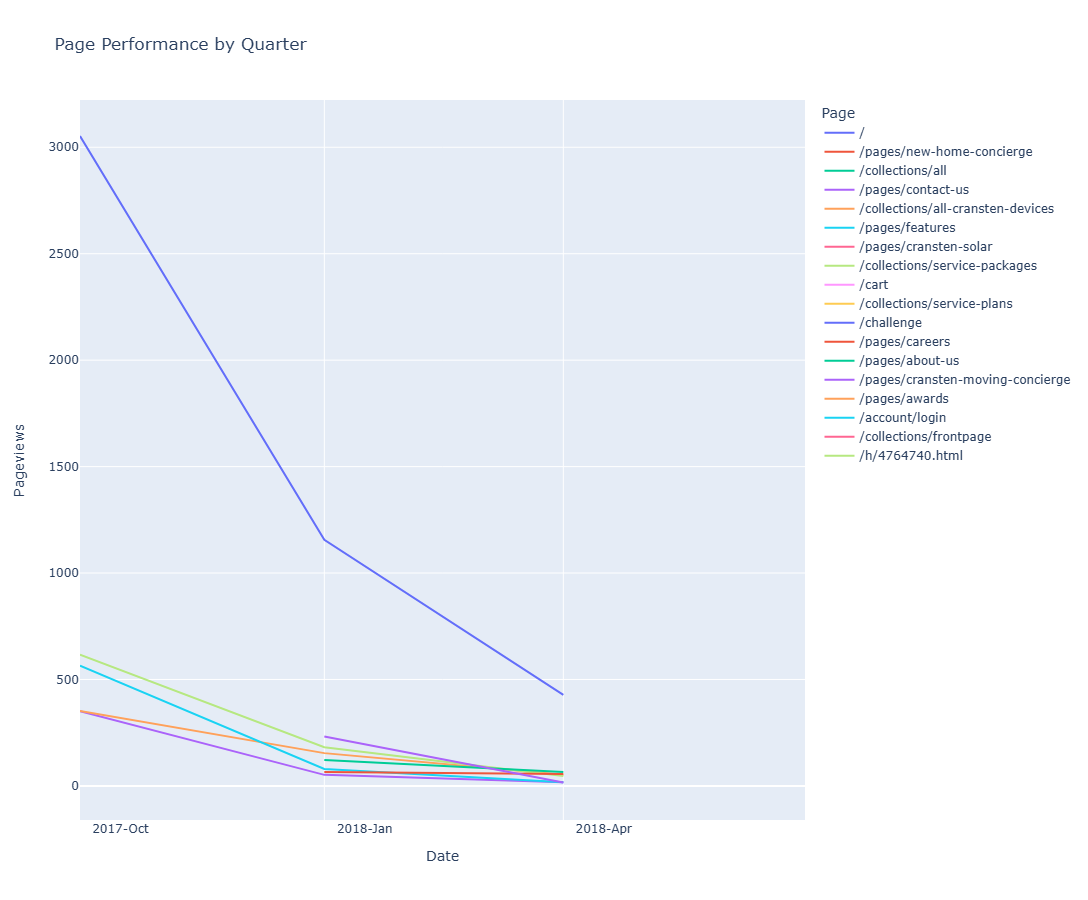

In [162]:
# Read the CSV file
df_pages = pd.read_csv('output/cransten/WP/Pages/consolidated-pages.csv')

# Convert all values in 'Page' column to strings and remove NaN
df_pages['Page'] = df_pages['Page'].astype(str).replace('nan', 'Unknown')

# Remove query parameters from URLs
df_pages['Page'] = df_pages['Page'].apply(lambda x: x.split('?')[0] if '?' in x else x)

# # Now, let's create the Date column
df_pages['Date'] = pd.to_datetime(df_pages['Year'].astype(str) + '-' + df_pages['Quarter'].apply(functions.quarter_to_month) + '-01')

# Convert Pageviews to Numeric
df_pages['Pageviews'] = pd.to_numeric(df_pages['Pageviews'].astype(str).str.replace(',', ''), errors='coerce')
# Sort by date
df_pages = df_pages.sort_values("Date")

# Create Line Plot with No Total and other excludes
include_list = [
    "/",
    "/cart",
    "/collections/service-packages",
    "/pages/cransten-solar",
    "/pages/features",
    "/collections/service-plans",
    "/collections/all-cransten-devices",
    "/pages/contact-us",
    "/collections/all",
    "/pages/new-home-concierge",
    "/pages/about-us",
    "/pages/careers",
    "/pages/cransten-moving-concierge",
    "/account/login",
    "/collections/frontpage",
    "/h/4764740.html",
    "/pages/awards",
    "/challenge"
]

fig = px.line(df_pages.query('Page in @include_list'), x='Date', y='Pageviews', color='Page', title='Page Performance by Quarter')

# Update the layout
fig.update_layout(
    autosize=False,
    width=1000,  # Width of the figure in pixels
    height=900  # Height of the figure in pixels
)

# Customize the x-axis to show both year and quarter
fig.update_xaxes(
    dtick="M3",
    tickformat="%Y-%b",  # This will show Year-Month
    ticklabelmode="period"
)

fig.show()
fig.write_html('output/cransten/WP/cransten-wp-page-performance.html')

In [163]:
# Usage
try:
    df = functions.build_ua_pages_dataframe('cransten/WP/Sources/', 'sources')
    # print(df.head())
    print(df.dtypes)
except ValueError as e:
    print(f"Error: {str(e)}")

Processing file: data/cransten/WP/Sources/Analytics All Web Site Data All Traffic 20171001-20171231.csv
Successfully processed Analytics All Web Site Data All Traffic 20171001-20171231.csv
Processing file: data/cransten/WP/Sources/Analytics All Web Site Data All Traffic 20180701-20180930.csv
Successfully processed Analytics All Web Site Data All Traffic 20180701-20180930.csv
Processing file: data/cransten/WP/Sources/Analytics All Web Site Data All Traffic 20180401-20180630.csv
Successfully processed Analytics All Web Site Data All Traffic 20180401-20180630.csv
Processing file: data/cransten/WP/Sources/Analytics All Web Site Data All Traffic 20180101-20180331.csv
Successfully processed Analytics All Web Site Data All Traffic 20180101-20180331.csv
Columns in the combined DataFrame:
['Source / Medium', 'Users', 'New Users', 'Sessions', 'Bounce Rate', 'Pages / Session', 'Avg. Session Duration', 'Goal Conversion Rate', 'Goal Completions', 'Goal Value', 'Year', 'Quarter']
Saved consolidated 

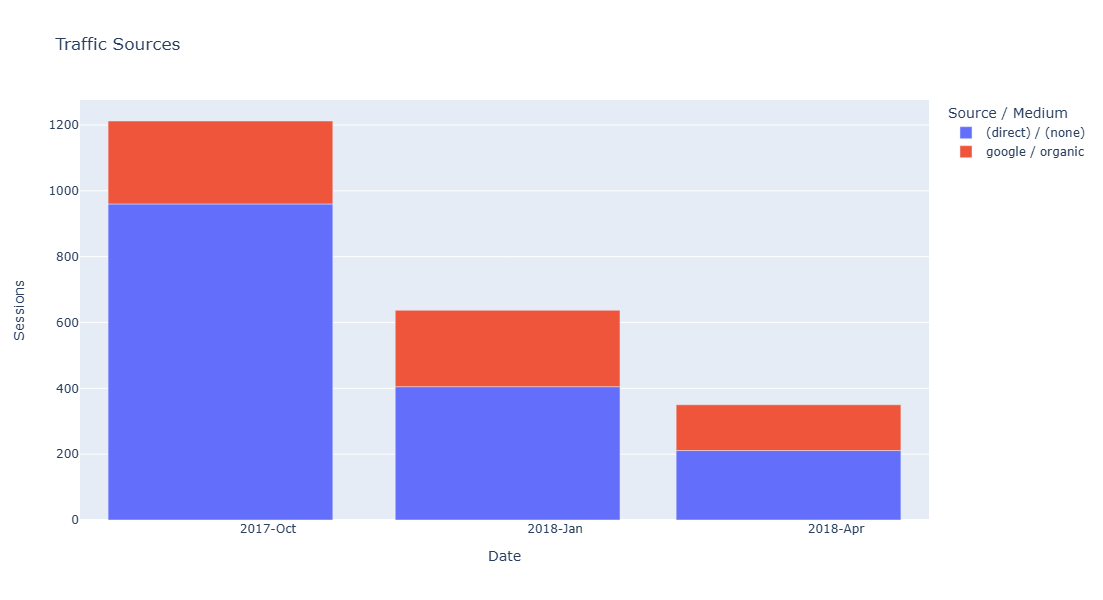

In [171]:

# Read the CSV file
df = pd.read_csv('output/cransten/WP/Sources/consolidated-sources.csv')

# # Now, let's create the Date column
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Quarter'].apply(functions.quarter_to_month) + '-01')

# Sort by date
df = df.sort_values("Date")

# Create Line Plot with No Total and other excludes
include_list = [
    "(direct) / (none)",
    "google / organic",
    "oqowsjujpjgqgrlzac.com / referral",
    "perform-likeir-alibaba.info / referral",
    "chicago-daily-newsoo.info / referral",
    "krumbleate-ads.info / referral",
    "growth-hackinger.info / referral",
    "krumbleed-ads.info / referral",
    "reachive-publisher.info / referral"
]
fig = px.bar(df.query('`Source / Medium` in @include_list'), x='Date', y='Sessions', color='Source / Medium', title='Traffic Sources')

# Update the layout
fig.update_layout(
    autosize=False,
    width=1000,  # Width of the figure in pixels
    height=600  # Height of the figure in pixels
)

# Customize the x-axis to show both year and quarter
fig.update_xaxes(
    dtick="M3",
    tickformat="%Y-%b",  # This will show Year-Month
    ticklabelmode="period"
)

fig.show()
fig.write_html('output/cransten/WP/cransten-wp-sources-mediums.html')

In [23]:
# Convert 'Date' from date time to date type
# df['Date'] = df['Date'].dt.date

# # Assuming df is your DataFrame and it has columns 'Date' and 'Pageviews'
# quarters = df['Date'].unique()
# # Update the layout

# for quarter in quarters:
#     df_quarter = df[df['Date'] == quarter]
#     fig = px.pie(df_quarter, values='Users', names='Source / Medium', title=f'Pie Chart for Quarter {quarter}')
#     fig.update_layout(
#         autosize=False,
#         width=600,  # Width of the figure in pixels
#         height=600  # Height of the figure in pixels
#     )
#     fig.show()

In [164]:
# Usage
try:
    df = functions.build_ua_pages_dataframe('cransten/WP/Landing Pages/', 'landing-pages')
    # print(df.head())
    print(df.dtypes)
except ValueError as e:
    print(f"Error: {str(e)}")

Processing file: data/cransten/WP/Landing Pages/Analytics All Web Site Data Landing Pages 20180101-20180331.csv
Successfully processed Analytics All Web Site Data Landing Pages 20180101-20180331.csv
Processing file: data/cransten/WP/Landing Pages/Analytics All Web Site Data Landing Pages 20180401-20180630.csv
Successfully processed Analytics All Web Site Data Landing Pages 20180401-20180630.csv
Processing file: data/cransten/WP/Landing Pages/Analytics All Web Site Data Landing Pages 20180701-20180930.csv
Successfully processed Analytics All Web Site Data Landing Pages 20180701-20180930.csv
Processing file: data/cransten/WP/Landing Pages/Analytics All Web Site Data Landing Pages 20171001-20171231.csv
Successfully processed Analytics All Web Site Data Landing Pages 20171001-20171231.csv
Columns in the combined DataFrame:
['Landing Page', 'Sessions', '% New Sessions', 'New Users', 'Bounce Rate', 'Pages / Session', 'Avg. Session Duration', 'Goal Conversion Rate', 'Goal Completions', 'Goal 

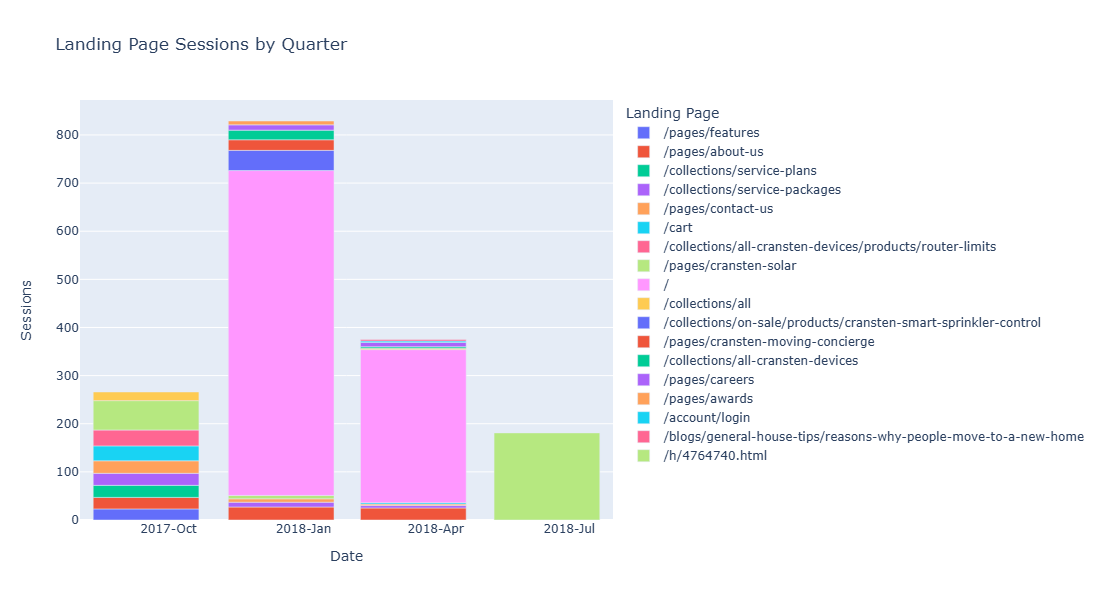

In [167]:
# Read the CSV file
df = pd.read_csv('output/cransten/WP/Landing Pages/consolidated-landing-pages.csv')

# Remove query parameters from URLS:
df['Landing Page'] = df['Landing Page'].apply(lambda x: x.split('?')[0] if isinstance(x, str) and '?' in x else x)

# Now, let's create the Date column
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Quarter'].apply(functions.quarter_to_month) + '-01')

# Sort by date
df = df.sort_values("Date")

# Create Line Plot with No Total
exclude_list = [
    "total",
    "7/1/18",
    "7/2/18",
    "7/3/18",
    "7/4/18",
    "7/5/18",
    "7/6/18",
    "7/7/18"
]
fig = px.bar(df.query('`Landing Page` not in @exclude_list'), x='Date', y='Sessions', color='Landing Page', title='Landing Page Sessions by Quarter')

# Update the layout
fig.update_layout(
    autosize=False,
    width=1200,  # Width of the figure in pixels
    height=600  # Height of the figure in pixels
)

# Customize the x-axis to show both year and quarter
fig.update_xaxes(
    dtick="M3",
    tickformat="%Y-%b",  # This will show Year-Month
    ticklabelmode="period"
)

fig.show()
fig.write_html('output/cransten/WP/cransten-wp-landing-pages.html') 

In [169]:
# Usage
try:
    df = functions.build_ua_pages_dataframe('cransten/WP/Events or Conversions', 'events')
    # print(df.head())
    print(df.dtypes)
except ValueError as e:
    print(f"Error: {str(e)}")

Processing file: data/cransten/WP/Events or Conversions/Analytics All Web Site Data Top Events 20180701-20180930.csv
Successfully processed Analytics All Web Site Data Top Events 20180701-20180930.csv
Processing file: data/cransten/WP/Events or Conversions/Analytics All Web Site Data Top Events 20180401-20180630.csv
Successfully processed Analytics All Web Site Data Top Events 20180401-20180630.csv
Processing file: data/cransten/WP/Events or Conversions/Analytics All Web Site Data Top Events 20180101-20180331.csv
Successfully processed Analytics All Web Site Data Top Events 20180101-20180331.csv
Processing file: data/cransten/WP/Events or Conversions/Analytics All Web Site Data Top Events 20171001-20171231.csv
Successfully processed Analytics All Web Site Data Top Events 20171001-20171231.csv
Columns in the combined DataFrame:
['Day Index', 'Total Events', 'Year', 'Quarter', 'Event Category', 'Unique Events', 'Event Value', 'Avg. Value']
Saved consolidated data to output/cransten/WP/Ev

In [151]:
# GOAL URLS / CONVERSIONS  
# Read the CSV file
df_goal_urls = pd.read_csv('output/cransten/WP/Events or Conversions/consolidated-goal-urls.csv')

# # Now, let's create the Date column
df_goal_urls['Date'] = pd.to_datetime(df_goal_urls['Year'].astype(str) + '-' + df_goal_urls['Quarter'].apply(functions.quarter_to_month) + '-01')

# Convert Pageviews to Numeric
df_goal_urls['Goal Completions'] = pd.to_numeric(df_goal_urls['Goal Completions'].astype(str).str.replace(',', ''), errors='coerce')
# Sort by date
df_goal_urls = df_goal_urls.sort_values("Date")

# Create Line Plot with the goals completion locations that exist
include_list = []
fig = px.bar(df_goal_urls.query('`Goal Completion Location` in @include_list'), x='Date', y='Goal Completions', color='Goal Completion Location', title='Goal Completions by Quarter')

# Update the layout
fig.update_layout(
    autosize=False,
    width=1200,  # Width of the figure in pixels
    height=600  # Height of the figure in pixels
)

# Customize the x-axis to show both year and quarter
fig.update_xaxes(
    dtick="M3",
    tickformat="%Y-%b",  # This will show Year-Month
    ticklabelmode="period"
)

fig.show()
fig.write_html('output/cransten/WP/cransten-wp-goal-urls.html')

KeyError: 'Goal Completions'

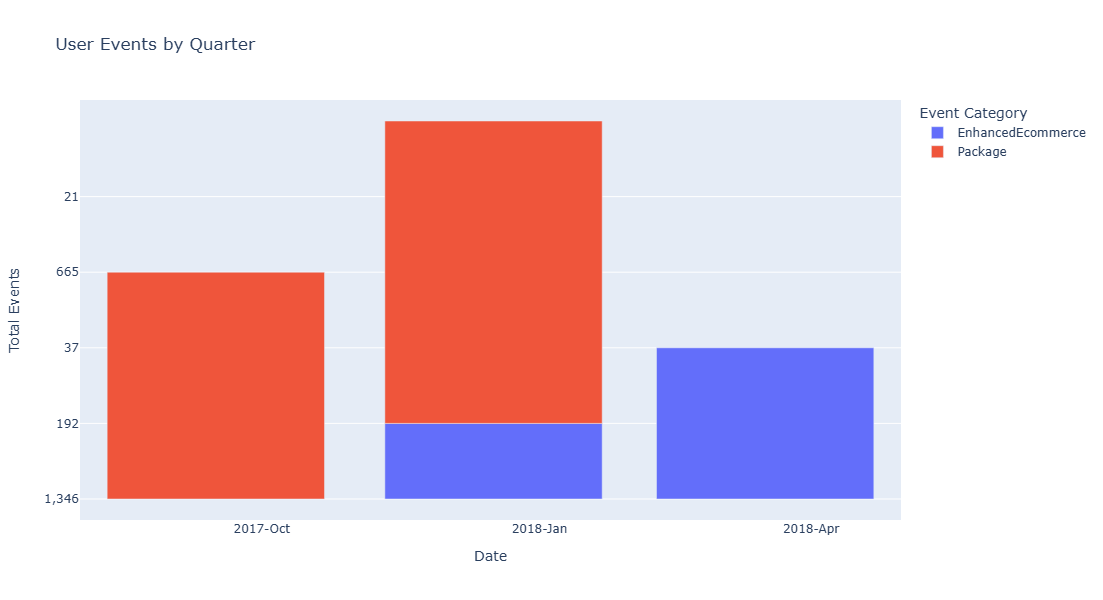

In [170]:
# EVENTS 
# Read the CSV file
df = pd.read_csv('output/cransten/WP/Events or Conversions/consolidated-events.csv')

# # Now, let's create the Date column
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Quarter'].apply(functions.quarter_to_month) + '-01')

# Convert Pageviews to Numeric
# df['Total Events'] = pd.to_numeric(df['Total Events'].str.replace(',', ''), errors='coerce')
# Sort by date
df = df.sort_values("Date")

# Create Line Plot with the goals completion locations that exist
include_list = ["EnhancedEcommerce","Package"]
fig = px.bar(df.query('`Event Category` in @include_list'), x='Date', y='Total Events', color='Event Category', title='User Events by Quarter')

# Update the layout
fig.update_layout(
    autosize=False,
    width=1000,  # Width of the figure in pixels
    height=600  # Height of the figure in pixels
)

# Customize the x-axis to show both year and quarter
fig.update_xaxes(
    dtick="M3",
    tickformat="%Y-%b",  # This will show Year-Month
    ticklabelmode="period"
)

fig.show()
fig.write_html('output/cransten/WP/cransten-wp-events.html')